In [3]:
import pandas as pd


df = pd.read_csv('titanic_dataset.csv')
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


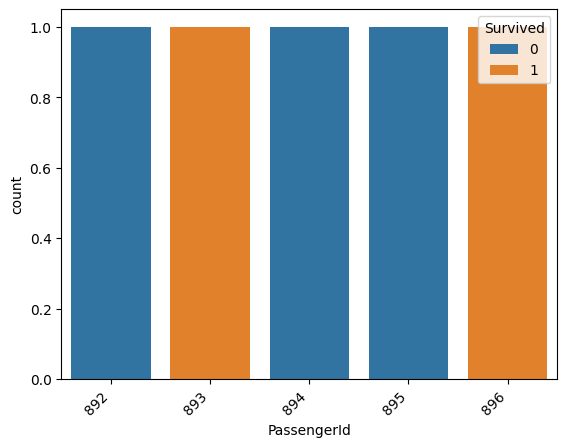

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df.head(),x='PassengerId',hue='Survived')
plt.xticks(rotation=45, ha='right');

In [7]:
# سوف نقوم الآن بتحويل عمود "Survived" 
# من فئوي إلى عدد صحيح باستخدام دالة 
# pandas `get_dummies`.

pre_df = pd.get_dummies(df,columns=['PassengerId'],drop_first=True)
pre_df.head(30)

,Survived,PassengerId_893,PassengerId_894,PassengerId_895,PassengerId_896,PassengerId_897,PassengerId_898,PassengerId_899,PassengerId_900,PassengerId_901,...,PassengerId_1300,PassengerId_1301,PassengerId_1302,PassengerId_1303,PassengerId_1304,PassengerId_1305,PassengerId_1306,PassengerId_1307,PassengerId_1308,PassengerId_1309
0,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,1,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,0,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
8,1,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
9,0,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# we will define feature (X) and target (y) variables, 
# and split the dataset into training and testing sets. 

from sklearn.model_selection import train_test_split

X = pre_df.drop('Survived', axis=1)
y = pre_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

In [9]:
# بناء النماذج والتدريب

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train);

In [10]:
# تقييم النموذج

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.41304347826086957
F1 Score: 0.5846153846153846
